In [16]:
import pickle
import numpy as np
from pathlib import Path
from score_keeper import score_keeper

# Hard coded to only work with 5 folds
def get_statistics(base_path):
    keeper = score_keeper()
    folds = 5
    for i in range(folds):
        current_dir = base_path/str(i+1)
        pred_probs = np.load(current_dir /"prediction_probabilities.npy", allow_pickle = True)
        lang_map_file = open(current_dir / "lang_to_idx.pkl", "rb")
        lang_to_idx = pickle.load(lang_map_file)
        keeper.add_pred_prob(lang_to_idx, pred_probs)
    langs_to_print = ['en', 'es', 'fr', 'de', 'it', 'pt', 'tr', 'nl', 'sv']

    f1_weighted = keeper.get_f1("weighted")
    f1_micro = keeper.get_f1("micro")
    f1_macro = keeper.get_f1("macro")

    print(f"F1 weighted average: {f1_weighted}")
    print(f"F1-micro: {f1_micro}")
    print(f"F1-macro: {f1_macro}")
    print(f"Accuracy@1: {keeper.get_accuracy1()}")
    print(f"Accuracy@3: {keeper.get_accuracy3()}")
    print(f"Accuracy@5: {keeper.get_accuracy5()}")
    
    keeper.print_confusion_matrix_all_langs()
    keeper.print_confusion_matrix_select(langs_to_print)

    print("===============================================")


F1 weighted average: 0.8936898125340594
F1-micro: 0.8934498201766367
F1-macro: 0.8835374055331228
Accuracy@1: 0.8934498201766367
Accuracy@3: 0.9717168009651279
Accuracy@5: 0.9835532755167077


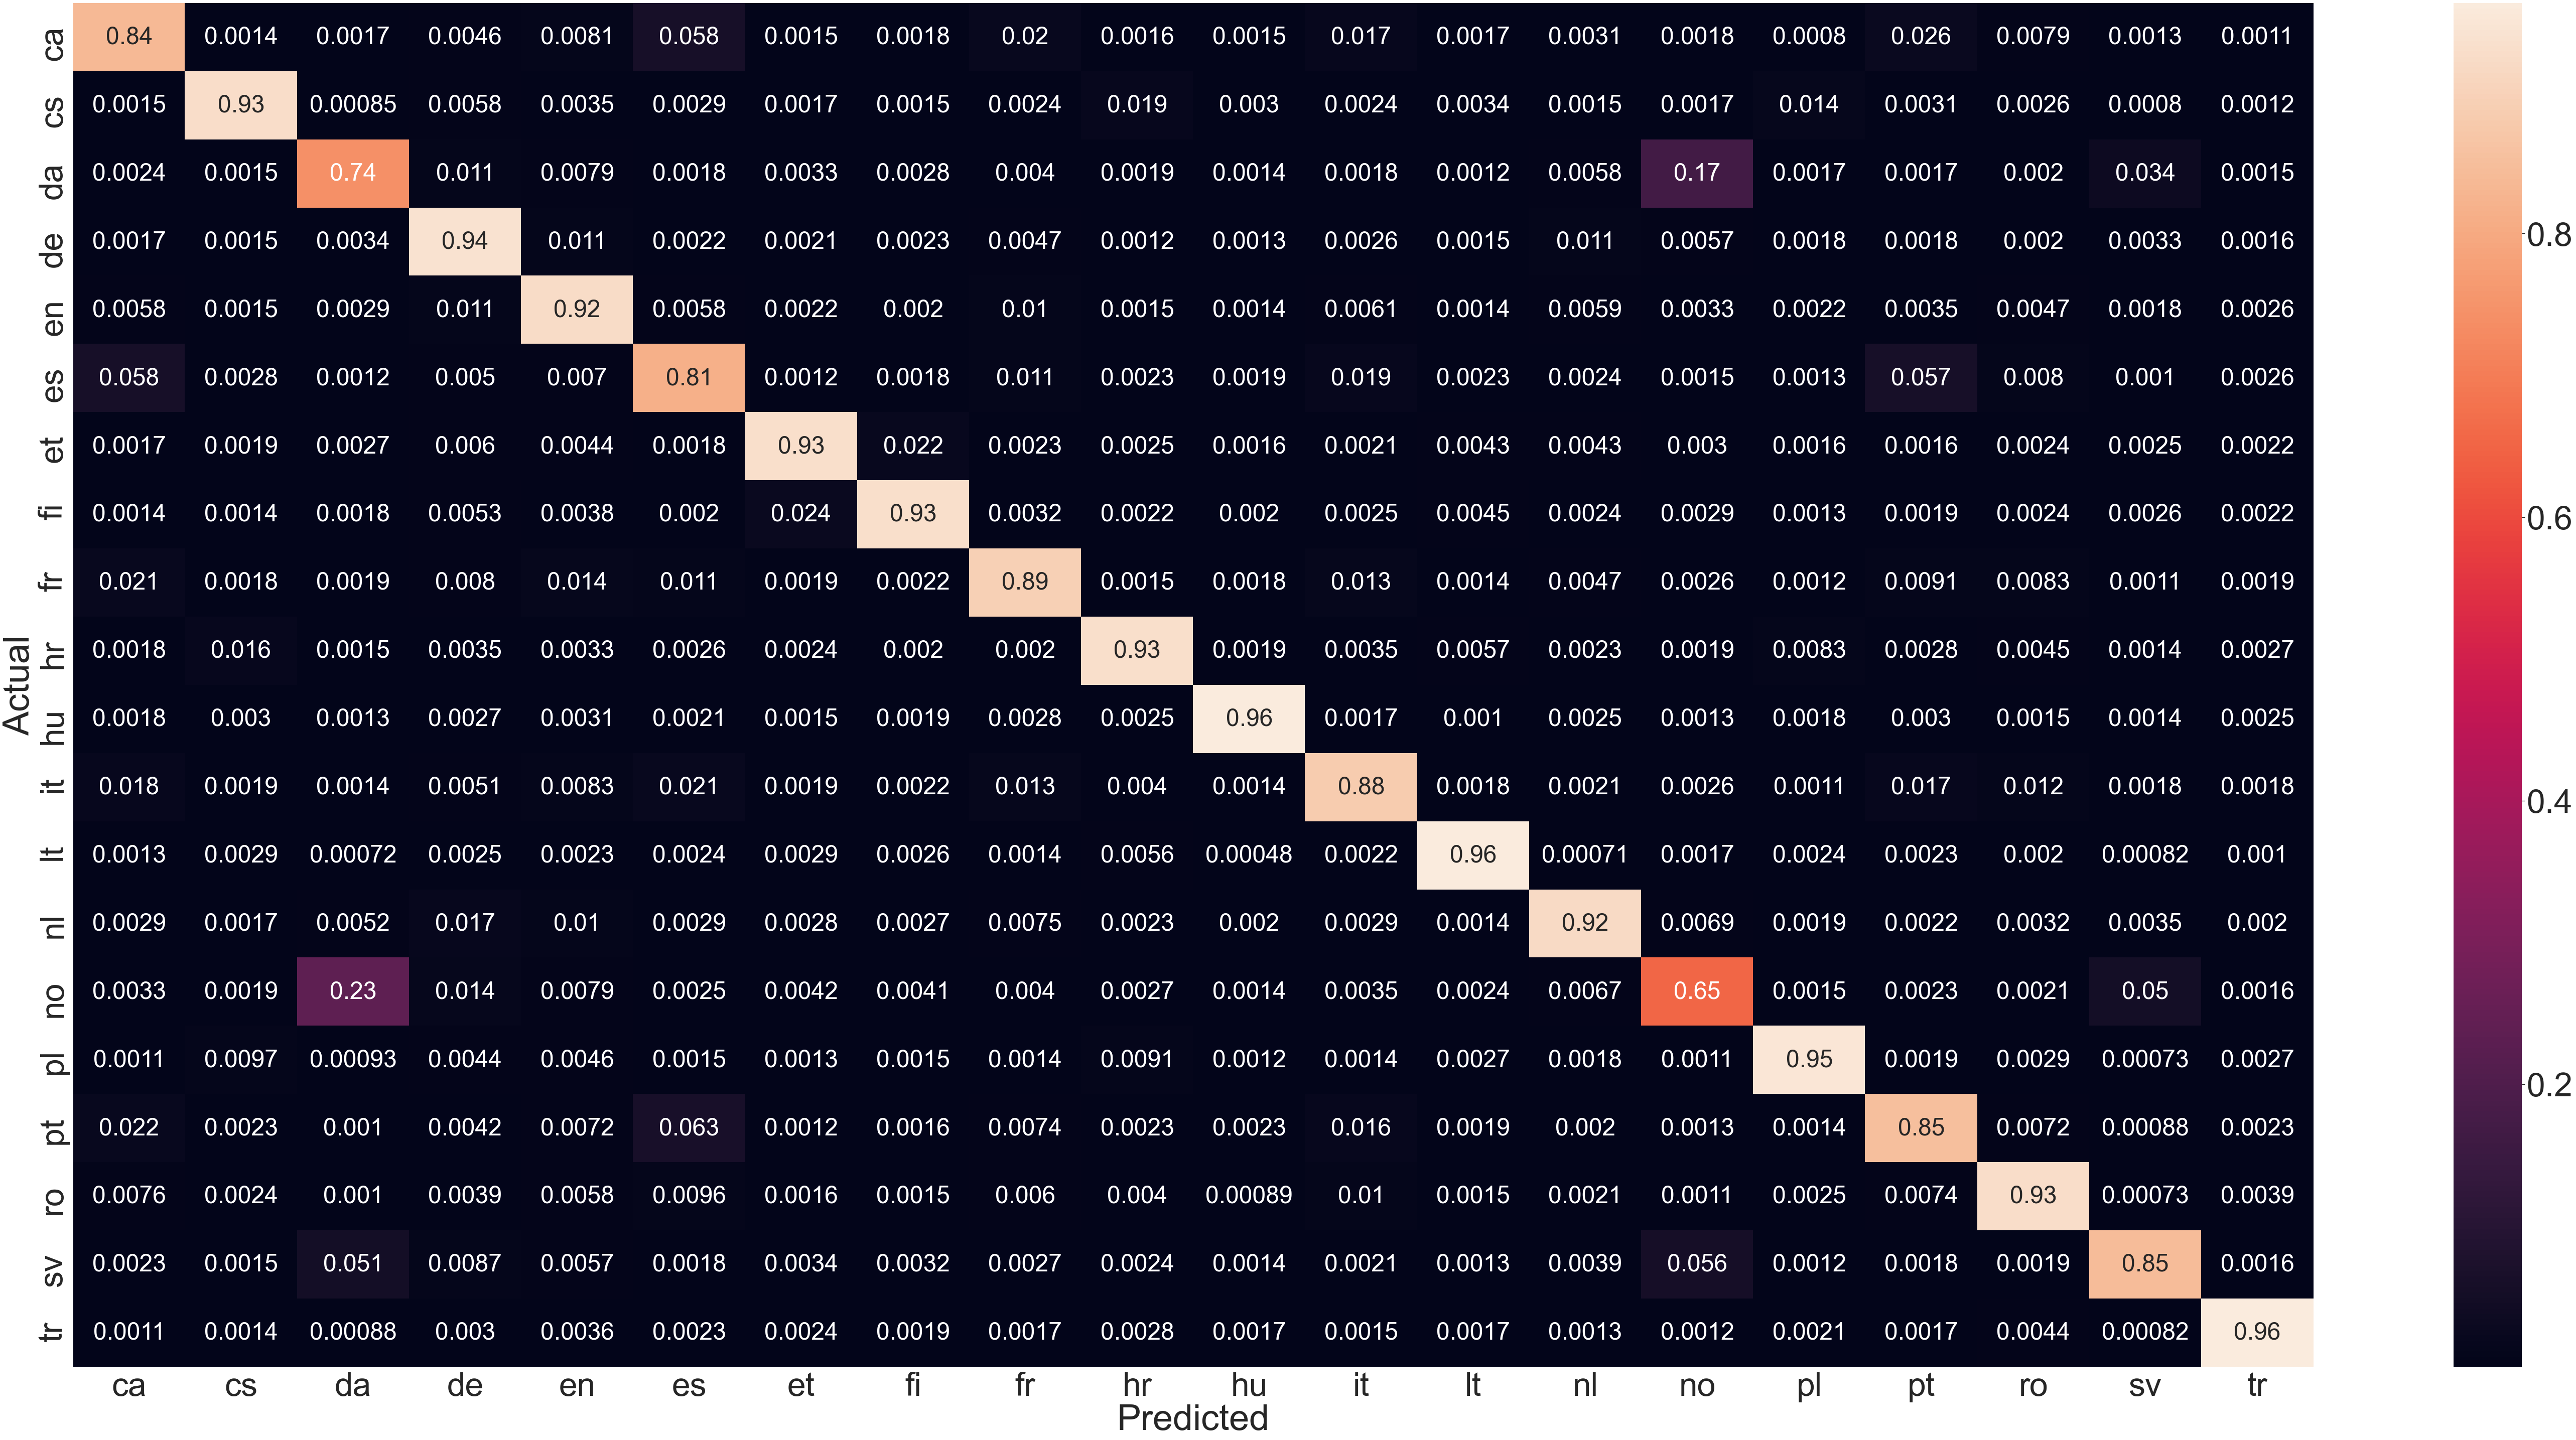

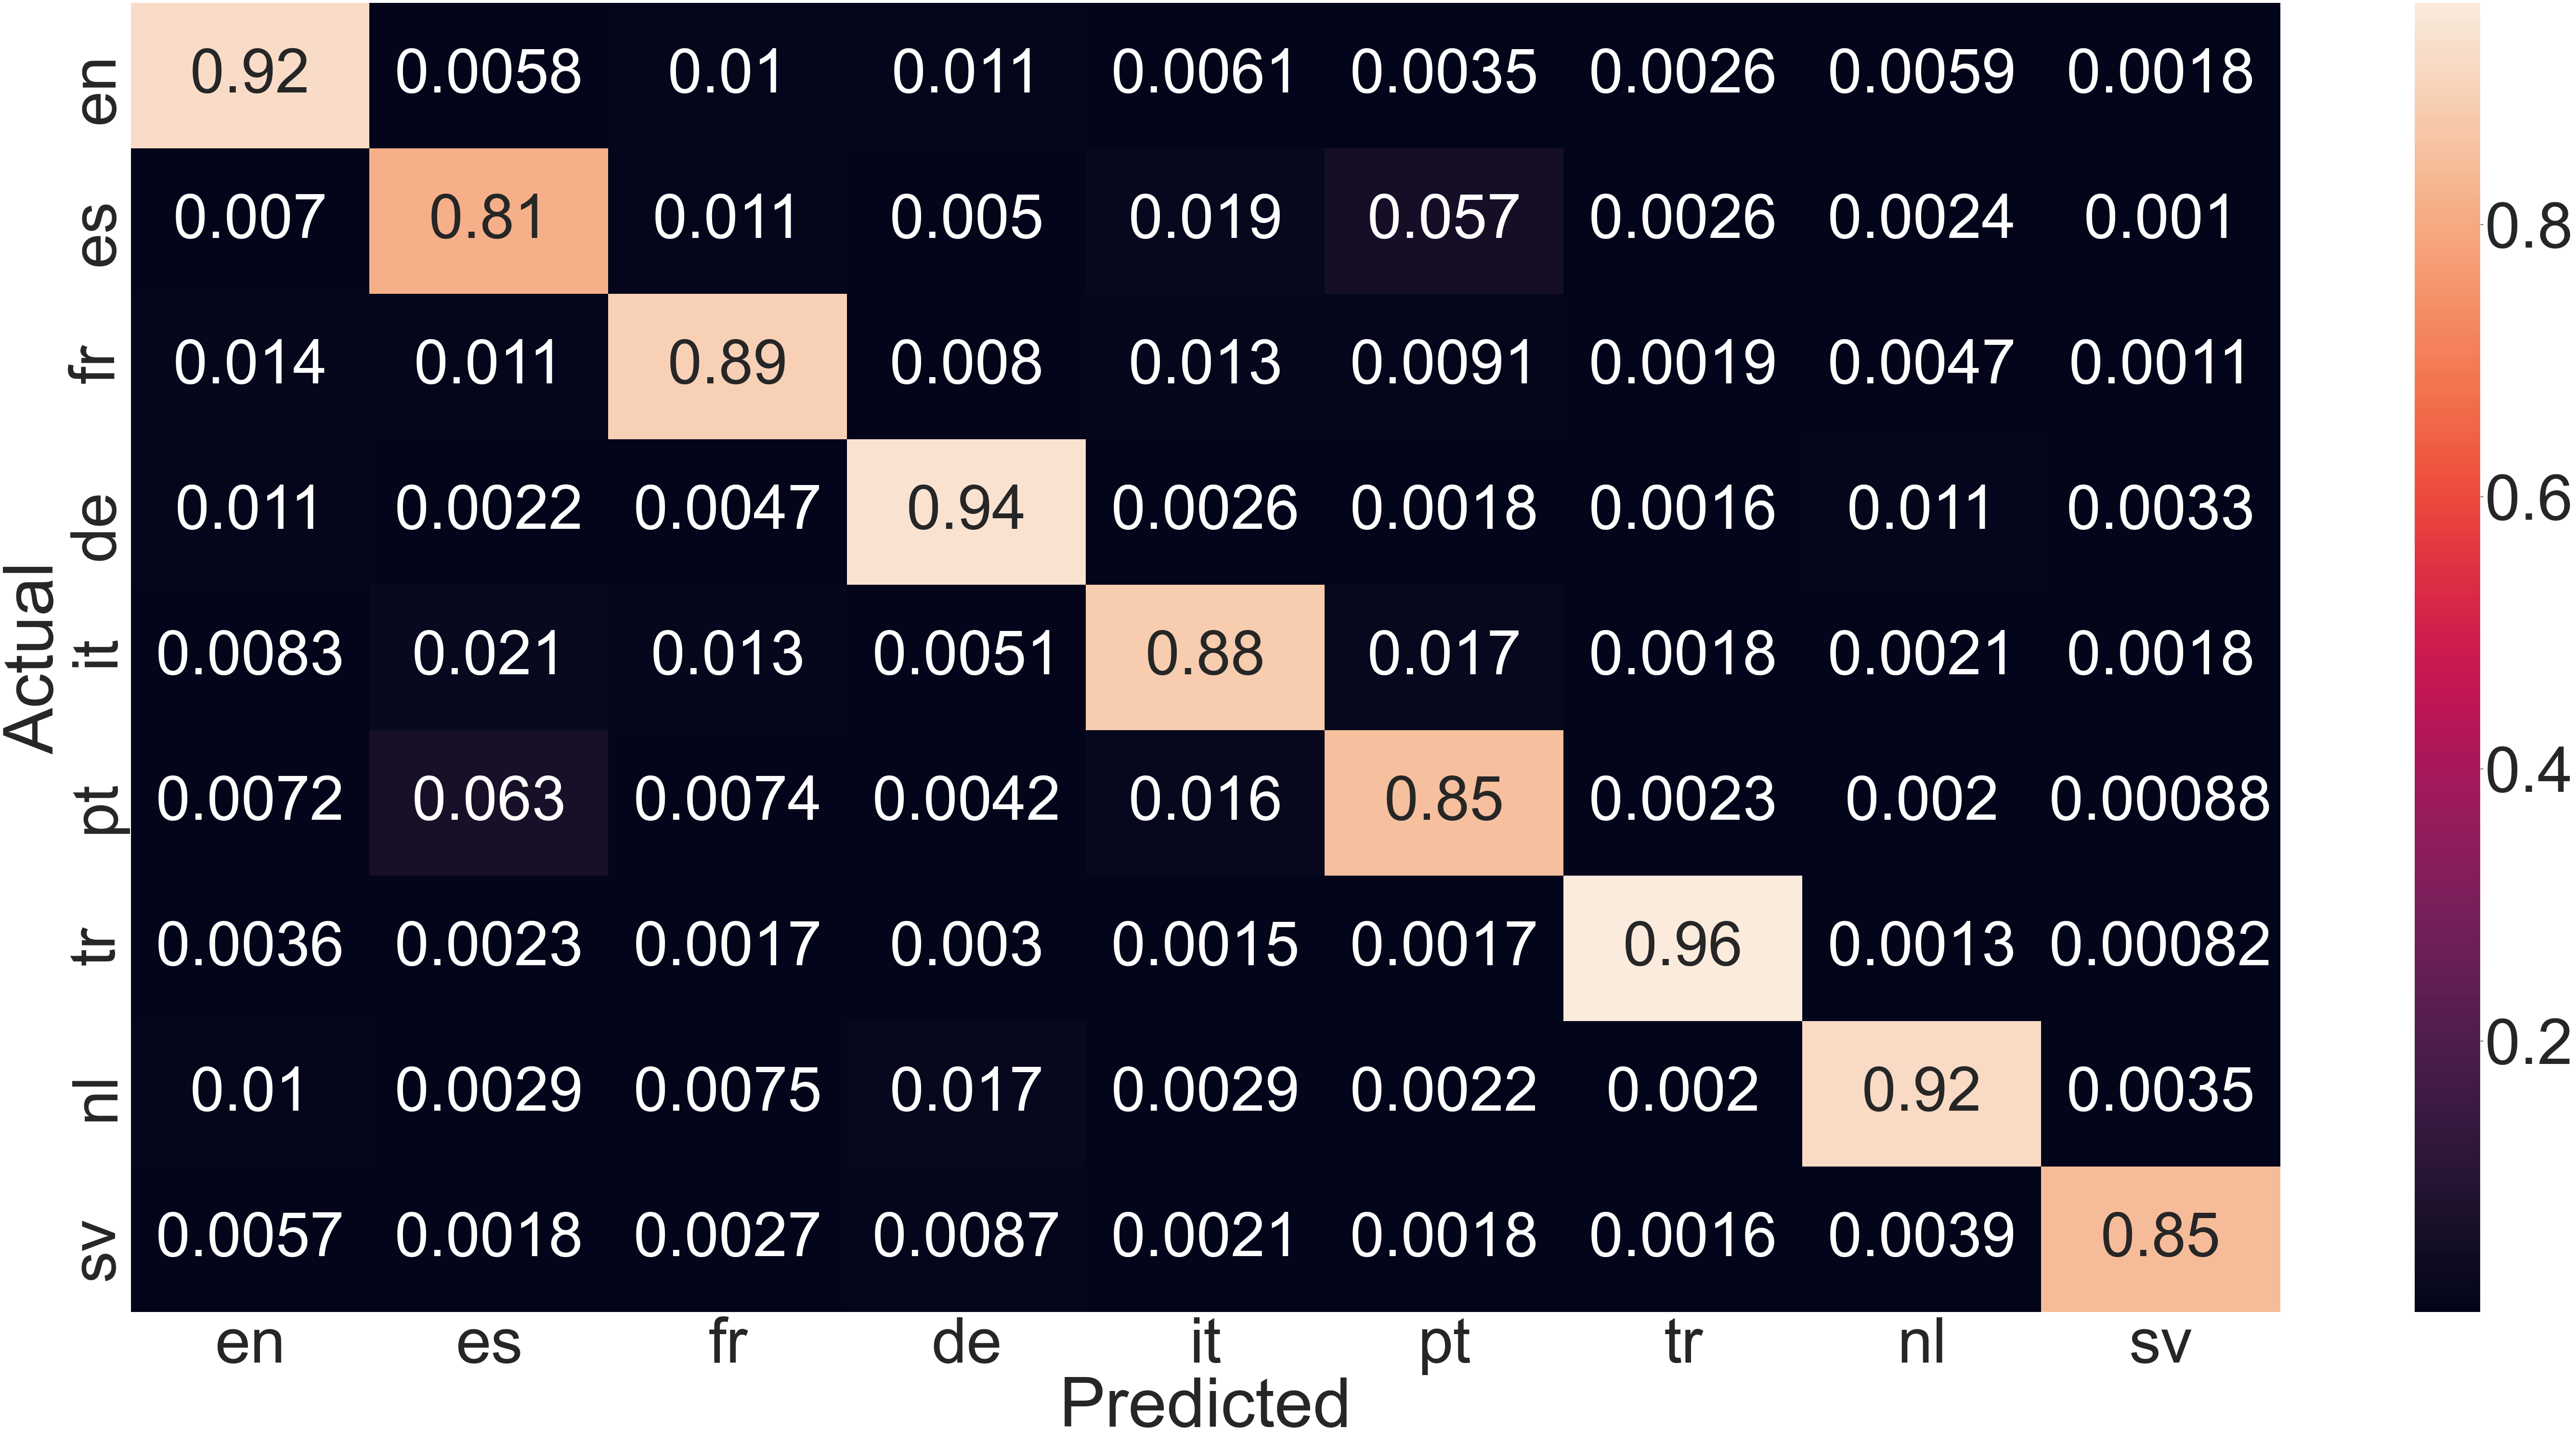

In [23]:
base_path = Path("PATH TO EXPERIMENTS FOLDER GOES HERE")
get_statistics(base_path)
